### 🗂️ 데이터 구성
---
    1. use_log_months.csv : 이용이력을 연월/고객별로 집계한 데이터
    2. customer_join : 이용 이력을 포함한 고객 데이터

In [239]:
# 테크닉 41. 데이터를 읽어 들이고 이용 데이터를 수정하자

In [240]:
import pandas as pd
customer = pd.read_csv('customer_join.csv')
uselog_months = pd.read_csv('use_log_months.csv', parse_dates=['연월'])

/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_4783/54721157.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  uselog_months = pd.read_csv('use_log_months.csv', parse_dates=['연월'])


In [241]:
year_list = uselog_months['연월'].unique()
year_list

array(['201804', '201805', '201806', '201807', '201808', '201809',
       '201810', '201811', '201812', '201901', '201902', '201903'],
      dtype=object)

In [242]:
scaled_data = uselog_months.loc[uselog_months['연월'].between('201805', '201903')]
scaled_data.head()

,연월,customer_id,count
2991,201805,AS002855,5
2992,201805,AS009373,4
2993,201805,AS015233,7
2994,201805,AS015315,3
2995,201805,AS015739,5


In [243]:
pre_data = uselog_months.pivot_table(index='customer_id',
                        columns='연월').stack()
pre_data.reset_index(inplace=True)
pre_data.head()

/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_4783/2102652119.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pre_data = uselog_months.pivot_table(index='customer_id',


,customer_id,연월,count
0,AS002855,201804,4.0
1,AS002855,201805,5.0
2,AS002855,201806,5.0
3,AS002855,201807,5.0
4,AS002855,201808,3.0


In [244]:
pre_data['연월'] = pd.to_datetime(pre_data['연월'], format='%Y%m')
pre_data['다음월'] = pre_data['연월']+pd.DateOffset(months=1)
pre_data['연월'] =  pre_data['연월'].dt.strftime('%Y%m')
pre_data['다음월'] =  pre_data['다음월'].dt.strftime('%Y%m')
pre_data.head()

,customer_id,연월,count,다음월
0,AS002855,201804,4.0,201805
1,AS002855,201805,5.0,201806
2,AS002855,201806,5.0,201807
3,AS002855,201807,5.0,201808
4,AS002855,201808,3.0,201809


In [245]:
scaled_data.rename(columns={'count':'count_0'}, inplace=True)
merge_data = pd.merge(how='left',
                      left=scaled_data,
                      right=pre_data,
                      left_on=['customer_id', '연월'],
                      right_on=['customer_id', '다음월'])
merge_data.drop(columns=['연월_y', '다음월'], inplace=True)
merge_data.rename(columns={'연월_x':'연월', 'count':'count_1'}, inplace=True)
merge_data

/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_4783/2280349916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data.rename(columns={'count':'count_0'}, inplace=True)


,연월,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0
...,...,...,...,...
33846,201903,TS995853,8,11.0
33847,201903,TS998593,8,7.0
33848,201903,TS999079,3,2.0
33849,201903,TS999231,6,6.0


In [246]:
# 테크닉 42. 탈퇴 전월의 탈퇴 고객 데이터를 작성하

In [247]:
exit_customer = customer.loc[customer['is_deleted']==1]
exit_customer['end_date'] = pd.to_datetime(exit_customer['end_date'])
exit_customer['exit_date'] = exit_customer['end_date']-pd.DateOffset(months=1)
exit_customer['연월'] = exit_customer['exit_date'].dt.strftime('%Y%m')
exit_customer

/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_4783/2685821625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer['end_date'] = pd.to_datetime(exit_customer['end_date'])
/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_4783/2685821625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer['exit_date'] = exit_customer['end_date']-pd.DateOffset(months=1)
/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_4783/2685821625.py:4: SettingWithCopyWarning: 
A v

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,연월
708,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,종일,10500,일반,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30,201803
729,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,주간,7500,일반,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30,201803
730,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,종일,10500,일반,1.0,1.0,1,1,0,2018-04-30,23,2018-03-30,201803
770,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,야간,6000,일반,3.5,3.5,4,3,1,2018-05-31,23,2018-04-30,201804
785,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,종일,10500,일반,3.0,3.0,3,3,0,2018-05-31,23,2018-04-30,201804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,OA143589,XXXXX,C03,F,2019-01-15,2019-02-28,CA1,1,야간,6000,일반,4.5,4.5,6,3,0,2019-02-28,1,2019-01-28,201901
4050,GD367382,XXXX,C01,M,2019-01-15,2019-03-31,CA1,1,종일,10500,일반,7.0,6.0,12,3,0,2019-03-31,2,2019-02-28,201902
4068,OA034442,XXXXX,C02,M,2019-02-05,2019-03-31,CA1,1,주간,7500,일반,7.0,7.0,11,3,0,2019-03-31,1,2019-02-28,201902
4086,PL508278,XXXXX,C03,M,2019-02-09,2019-03-31,CA1,1,야간,6000,일반,7.0,7.0,10,4,0,2019-03-31,1,2019-02-28,201902


In [248]:
exit_uselog = pd.merge(how='left',
                      left=merge_data,
                      right=exit_customer,
                      on=['customer_id', '연월'])
exit_uselog

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33846,201903,TS995853,8,11.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
33847,201903,TS998593,8,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
33848,201903,TS999079,3,2.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
33849,201903,TS999231,6,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [249]:
exit_uselog.dropna(subset='name', inplace=True)
exit_uselog

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,일반,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,일반,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,일반,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30758,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31,CA1,...,6000.0,일반,4.500000,4.5,7.0,1.0,0.0,2019-03-31,12.0,2019-02-28
30787,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31,CA3,...,6000.0,입회비무료,6.250000,6.0,8.0,5.0,0.0,2019-03-31,3.0,2019-02-28
30827,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31,CA3,...,7500.0,입회비무료,2.500000,2.0,5.0,1.0,0.0,2019-03-31,3.0,2019-02-28
30842,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31,CA1,...,7500.0,일반,4.250000,4.0,7.0,2.0,1.0,2019-03-31,12.0,2019-02-28


In [250]:
# 테크닉 43. 지속 회원의 데이터를 작성하자

In [251]:
conti_customer = customer.loc[customer['is_deleted']==0]
conti_uselog = pd.merge(how='left',
                        left=merge_data,
                        right=conti_customer,
                        on=['customer_id'])
conti_uselog.dropna(subset='name', inplace=True)
conti_uselog

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201805,AS002855,5,4.0,XXXX,C03,F,2016-11-01,NaN,CA1,...,야간,6000.0,일반,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0
1,201805,AS009373,4,3.0,XX,C01,F,2015-11-01,NaN,CA1,...,종일,10500.0,일반,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0
2,201805,AS015233,7,NaN,XXXXX,C01,M,2018-05-13,NaN,CA2,...,종일,10500.0,입회비반액할인,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaN,CA1,...,종일,10500.0,일반,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0
4,201805,AS015739,5,7.0,XXXXX,C03,M,2017-06-01,NaN,CA1,...,야간,6000.0,일반,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33846,201903,TS995853,8,11.0,XXXX,C01,M,2019-02-08,NaN,CA1,...,종일,10500.0,일반,9.500000,9.5,11.0,8.0,1.0,2019-04-30,2.0
33847,201903,TS998593,8,7.0,XXXXX,C03,M,2018-09-01,NaN,CA1,...,야간,6000.0,일반,8.142857,8.0,9.0,7.0,1.0,2019-04-30,7.0
33848,201903,TS999079,3,2.0,XXX,C03,M,2016-06-01,NaN,CA1,...,야간,6000.0,일반,4.916667,5.5,9.0,2.0,1.0,2019-04-30,34.0
33849,201903,TS999231,6,6.0,XXXX,C01,M,2017-03-01,NaN,CA1,...,종일,10500.0,일반,4.666667,5.0,8.0,1.0,1.0,2019-04-30,25.0


In [252]:
conti_uselog.sample(frac=1).reset_index(drop=True, inplace=True)
conti_uselog.drop_duplicates(subset='customer_id', inplace=True)
conti_uselog

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201805,AS002855,5,4.0,XXXX,C03,F,2016-11-01,NaN,CA1,...,야간,6000.0,일반,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0
1,201805,AS009373,4,3.0,XX,C01,F,2015-11-01,NaN,CA1,...,종일,10500.0,일반,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0
2,201805,AS015233,7,NaN,XXXXX,C01,M,2018-05-13,NaN,CA2,...,종일,10500.0,입회비반액할인,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaN,CA1,...,종일,10500.0,일반,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0
4,201805,AS015739,5,7.0,XXXXX,C03,M,2017-06-01,NaN,CA1,...,야간,6000.0,일반,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33640,201903,TS427167,11,NaN,XXXXX,C03,M,2019-03-08,NaN,CA1,...,야간,6000.0,일반,11.000000,11.0,11.0,11.0,1.0,2019-04-30,1.0
33693,201903,TS579641,9,NaN,XXXX,C02,F,2019-03-04,NaN,CA1,...,주간,7500.0,일반,9.000000,9.0,9.0,9.0,1.0,2019-04-30,1.0
33793,201903,TS878534,11,NaN,XXXXX,C03,M,2019-03-12,NaN,CA1,...,야간,6000.0,일반,11.000000,11.0,11.0,11.0,0.0,2019-04-30,1.0
33802,201903,TS905807,8,NaN,XXXX,C01,F,2019-03-02,NaN,CA1,...,종일,10500.0,일반,8.000000,8.0,8.0,8.0,0.0,2019-04-30,1.0


In [253]:
predict_data = pd.concat(objs=[conti_uselog, exit_uselog], ignore_index=True)
predict_data

/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_4783/2351674151.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predict_data = pd.concat(objs=[conti_uselog, exit_uselog], ignore_index=True)


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,XXXX,C03,F,2016-11-01,NaT,CA1,...,6000.0,일반,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0,NaT
1,201805,AS009373,4,3.0,XX,C01,F,2015-11-01,NaT,CA1,...,10500.0,일반,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0,NaT
2,201805,AS015233,7,NaN,XXXXX,C01,M,2018-05-13,NaT,CA2,...,10500.0,입회비반액할인,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0,NaT
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaT,CA1,...,10500.0,일반,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0,NaT
4,201805,AS015739,5,7.0,XXXXX,C03,M,2017-06-01,NaT,CA1,...,6000.0,일반,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31,CA1,...,6000.0,일반,4.500000,4.5,7.0,1.0,0.0,2019-03-31,12.0,2019-02-28
3942,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31,CA3,...,6000.0,입회비무료,6.250000,6.0,8.0,5.0,0.0,2019-03-31,3.0,2019-02-28
3943,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31,CA3,...,7500.0,입회비무료,2.500000,2.0,5.0,1.0,0.0,2019-03-31,3.0,2019-02-28
3944,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31,CA1,...,7500.0,일반,4.250000,4.0,7.0,2.0,1.0,2019-03-31,12.0,2019-02-28


In [254]:
# 테크닉 44. 예측할 달의 재적 기간을 작성하자
from dateutil.relativedelta import relativedelta
predict_data['now_date'] = pd.to_datetime(predict_data['연월'], format='%Y%m')
predict_data['start_date'] = pd.to_datetime(predict_data['start_date'])
predict_data['period'] = 0
predict_data

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,now_date,period
0,201805,AS002855,5,4.0,XXXX,C03,F,2016-11-01,NaT,CA1,...,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0,NaT,2018-05-01,0
1,201805,AS009373,4,3.0,XX,C01,F,2015-11-01,NaT,CA1,...,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0,NaT,2018-05-01,0
2,201805,AS015233,7,NaN,XXXXX,C01,M,2018-05-13,NaT,CA2,...,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0,NaT,2018-05-01,0
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaT,CA1,...,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0,NaT,2018-05-01,0
4,201805,AS015739,5,7.0,XXXXX,C03,M,2017-06-01,NaT,CA1,...,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0,NaT,2018-05-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31,CA1,...,4.500000,4.5,7.0,1.0,0.0,2019-03-31,12.0,2019-02-28,2019-02-01,0
3942,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31,CA3,...,6.250000,6.0,8.0,5.0,0.0,2019-03-31,3.0,2019-02-28,2019-02-01,0
3943,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31,CA3,...,2.500000,2.0,5.0,1.0,0.0,2019-03-31,3.0,2019-02-28,2019-02-01,0
3944,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31,CA1,...,4.250000,4.0,7.0,2.0,1.0,2019-03-31,12.0,2019-02-28,2019-02-01,0


In [255]:
for i in range(len(predict_data)):
    delta = relativedelta(predict_data['now_date'][i], predict_data['start_date'][i])
    predict_data['period'][i] = int(delta.years*12+delta.months)
predict_data

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,now_date,period
0,201805,AS002855,5,4.0,XXXX,C03,F,2016-11-01,NaT,CA1,...,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0,NaT,2018-05-01,18
1,201805,AS009373,4,3.0,XX,C01,F,2015-11-01,NaT,CA1,...,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0,NaT,2018-05-01,30
2,201805,AS015233,7,NaN,XXXXX,C01,M,2018-05-13,NaT,CA2,...,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0,NaT,2018-05-01,0
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaT,CA1,...,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0,NaT,2018-05-01,34
4,201805,AS015739,5,7.0,XXXXX,C03,M,2017-06-01,NaT,CA1,...,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0,NaT,2018-05-01,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31,CA1,...,4.500000,4.5,7.0,1.0,0.0,2019-03-31,12.0,2019-02-28,2019-02-01,11
3942,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31,CA3,...,6.250000,6.0,8.0,5.0,0.0,2019-03-31,3.0,2019-02-28,2019-02-01,1
3943,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31,CA3,...,2.500000,2.0,5.0,1.0,0.0,2019-03-31,3.0,2019-02-28,2019-02-01,1
3944,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31,CA1,...,4.250000,4.0,7.0,2.0,1.0,2019-03-31,12.0,2019-02-28,2019-02-01,11


In [256]:
predict_data.isnull().sum()

연월                      0
customer_id             0
count_0                 0
count_1               740
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2842
now_date                0
period                  0
dtype: int64

In [257]:
# 테크닉 45. 결측치를 제거하자
predict_data.dropna(subset=['count_1'], inplace=True)
predict_data

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,now_date,period
0,201805,AS002855,5,4.0,XXXX,C03,F,2016-11-01,NaT,CA1,...,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0,NaT,2018-05-01,18
1,201805,AS009373,4,3.0,XX,C01,F,2015-11-01,NaT,CA1,...,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0,NaT,2018-05-01,30
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaT,CA1,...,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0,NaT,2018-05-01,34
4,201805,AS015739,5,7.0,XXXXX,C03,M,2017-06-01,NaT,CA1,...,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0,NaT,2018-05-01,11
5,201805,AS019860,8,6.0,XXXXXX,C03,F,2017-10-01,NaT,CA1,...,6.083333,6.0,9.0,4.0,1.0,2019-04-30,18.0,NaT,2018-05-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31,CA1,...,4.500000,4.5,7.0,1.0,0.0,2019-03-31,12.0,2019-02-28,2019-02-01,11
3942,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31,CA3,...,6.250000,6.0,8.0,5.0,0.0,2019-03-31,3.0,2019-02-28,2019-02-01,1
3943,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31,CA3,...,2.500000,2.0,5.0,1.0,0.0,2019-03-31,3.0,2019-02-28,2019-02-01,1
3944,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31,CA1,...,4.250000,4.0,7.0,2.0,1.0,2019-03-31,12.0,2019-02-28,2019-02-01,11


In [258]:
# 테크닉 46. 문자열 변수를 처리할 수 있게 가공하자
target_col = ['campaign_name', 'class_name', 'gender', 'count_1', 'routine_flg', 'period', 'is_deleted']
predict_data = predict_data[target_col]
predict_data

,campaign_name,class_name,gender,count_1,routine_flg,period,is_deleted
0,일반,야간,F,4.0,1.0,18,0.0
1,일반,종일,F,3.0,1.0,30,0.0
3,일반,종일,M,6.0,1.0,34,0.0
4,일반,야간,M,7.0,1.0,11,0.0
5,일반,야간,F,6.0,1.0,7,0.0
...,...,...,...,...,...,...,...
3941,일반,야간,F,2.0,0.0,11,1.0
3942,입회비무료,야간,M,6.0,0.0,1,1.0
3943,입회비무료,주간,F,3.0,0.0,1,1.0
3944,일반,주간,F,3.0,1.0,11,1.0


In [259]:
predict_data = pd.get_dummies(predict_data)
predict_data

,count_1,routine_flg,period,is_deleted,campaign_name_일반,campaign_name_입회비무료,campaign_name_입회비반액할인,class_name_야간,class_name_종일,class_name_주간,gender_F,gender_M
0,4.0,1.0,18,0.0,True,False,False,True,False,False,True,False
1,3.0,1.0,30,0.0,True,False,False,False,True,False,True,False
3,6.0,1.0,34,0.0,True,False,False,False,True,False,False,True
4,7.0,1.0,11,0.0,True,False,False,True,False,False,False,True
5,6.0,1.0,7,0.0,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3941,2.0,0.0,11,1.0,True,False,False,True,False,False,True,False
3942,6.0,0.0,1,1.0,False,True,False,True,False,False,False,True
3943,3.0,0.0,1,1.0,False,True,False,False,False,True,True,False
3944,3.0,1.0,11,1.0,True,False,False,False,False,True,True,False


In [260]:
predict_data.drop(columns=['campaign_name_일반', 'class_name_야간', 'gender_M'], inplace=True)
predict_data

,count_1,routine_flg,period,is_deleted,campaign_name_입회비무료,campaign_name_입회비반액할인,class_name_종일,class_name_주간,gender_F
0,4.0,1.0,18,0.0,False,False,False,False,True
1,3.0,1.0,30,0.0,False,False,True,False,True
3,6.0,1.0,34,0.0,False,False,True,False,False
4,7.0,1.0,11,0.0,False,False,False,False,False
5,6.0,1.0,7,0.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
3941,2.0,0.0,11,1.0,False,False,False,False,True
3942,6.0,0.0,1,1.0,True,False,False,False,False
3943,3.0,0.0,1,1.0,True,False,False,True,True
3944,3.0,1.0,11,1.0,False,False,False,True,True


In [261]:
# 테크닉 47. 의사 결정트리를 사용해서 탈퇴 예측 모델을 구축하자

In [262]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

exit = predict_data.loc[predict_data['is_deleted']==1]
conti = predict_data.loc[predict_data['is_deleted']==0].sample(len(exit))

train_data = pd.concat(objs=[exit, conti], ignore_index=True)
train_result = train_data['is_deleted']
del train_data['is_deleted']

train_input, test_input, train_target, test_target = train_test_split(train_data,
                                                                      train_result)

model = DecisionTreeClassifier(random_state=42)
model.fit(train_input, train_target)
test_target_pred = model.predict(test_input)
test_target_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0.

In [263]:
# 테크닉 48. 예측 모델을 평가하고 모델을 튜닝해보자
from sklearn.metrics import accuracy_score
accuracy_score(test_target, test_target_pred)

0.9182509505703422

In [264]:
print(model.score(train_input, train_target))
print(model.score(test_input, test_target))

0.9828897338403042
0.9182509505703422


In [265]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(train_input, train_target)
print(model.score(train_input, train_target))
print(model.score(test_input, test_target))

0.9385297845373891
0.9220532319391636


In [266]:
# 테크닌ㄱ 49. 모델에 기여하는 변수를 확인하자
pd.DataFrame({
    'columns':model.feature_names_in_,
    'Importances':model.feature_importances_
})

,columns,Importances
0,count_1,0.273848
1,routine_flg,0.029815
2,period,0.679372
3,campaign_name_입회비무료,0.016873
4,campaign_name_입회비반액할인,0.000000
5,class_name_종일,0.000091
6,class_name_주간,0.000000
7,gender_F,0.000000


[Text(0.5426829268292683, 0.9166666666666666, 'x[2] <= 11.5\ngini = 0.5\nsamples = 1578\nvalue = [789, 789]'),
 Text(0.2804878048780488, 0.75, 'x[0] <= 5.5\ngini = 0.354\nsamples = 905\nvalue = [208, 697]'),
 Text(0.41158536585365857, 0.8333333333333333, 'True  '),
 Text(0.13414634146341464, 0.5833333333333334, 'x[0] <= 4.5\ngini = 0.077\nsamples = 596\nvalue = [24, 572]'),
 Text(0.04878048780487805, 0.4166666666666667, 'x[0] <= 3.5\ngini = 0.008\nsamples = 496\nvalue = [2, 494]'),
 Text(0.024390243902439025, 0.25, 'gini = 0.0\nsamples = 358\nvalue = [0, 358]'),
 Text(0.07317073170731707, 0.25, 'x[5] <= 0.5\ngini = 0.029\nsamples = 138\nvalue = [2, 136]'),
 Text(0.04878048780487805, 0.08333333333333333, 'gini = 0.057\nsamples = 68\nvalue = [2, 66]'),
 Text(0.0975609756097561, 0.08333333333333333, 'gini = 0.0\nsamples = 70\nvalue = [0, 70]'),
 Text(0.21951219512195122, 0.4166666666666667, 'x[2] <= 7.5\ngini = 0.343\nsamples = 100\nvalue = [22, 78]'),
 Text(0.17073170731707318, 0.25, 'x[

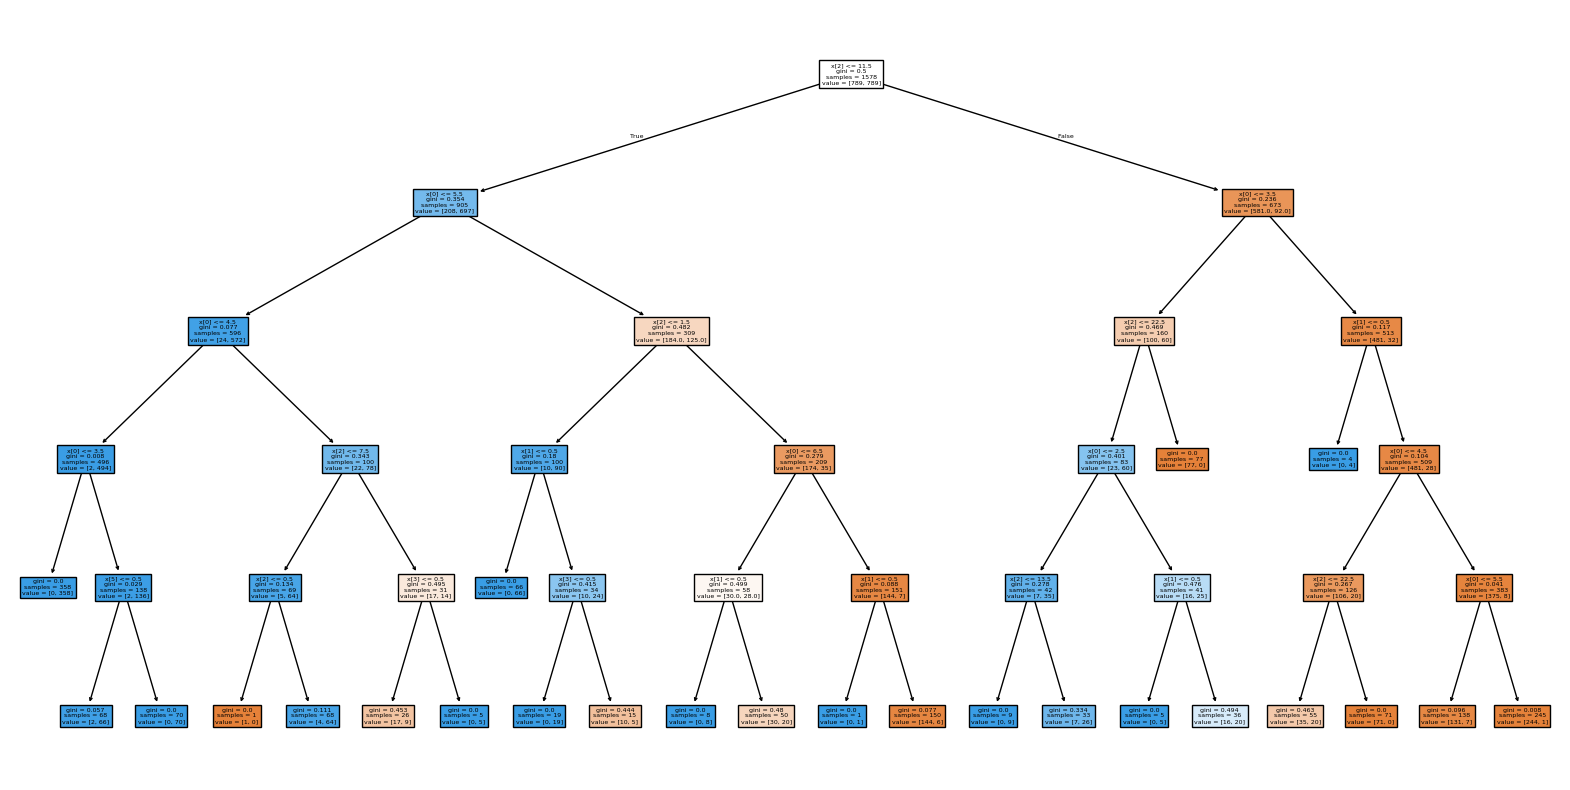

In [267]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True)

In [269]:
# 테크닉 50. 회원 탈퇴를 예측하자
model.predict_proba([test_input.iloc[1]])

/Users/hack/Develop/Git/pandas_in_action/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.6, 0.4]])